# Process data and compare populations.
(for now just histograms)

###### Import libraries and imported data from last program

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# me still chk imported data for issues.  saw something wierd at the end of one
# make sure merging family right.

In [3]:

df15 = pd.read_pickle('Ref15_merged')
df09 = pd.read_pickle('Ref09_merged')


In [4]:
# combine two years into one dataset


frames = [df09, df15]
df_2y = pd.concat(frames)

#### Recode vars:  

In [5]:

'''
1. Create main analysis variable:  Unemployment classification: employed, long-term unemployed, short-term unemployed
2. Change format to numeric so we can analyze we will use in analysis
3. Rename analysis variables to more easily understand in later anlaysis
'''

# weighting?

#lkweeks :  weeks looking if employed in last year
#nwlkwk :  weeks looking if not employed in last year

df_2y['nwlkwk2'] = df_2y['nwlkwk'].astype('float')
df_2y['lkweeks2'] = df_2y['lkweeks'].astype('float')

df_2y['UnempWks'] = df_2y['nwlkwk2'] + df_2y['lkweeks2']


# Create Long Term Unemployed variable to compare populations
df_2y['LTunemp'] = np.where(df_2y['UnempWks']>=27, 'yes', 'no')
df_2y['LTunempN'] = np.where(df_2y['UnempWks']>=27, 1, 0)


# later see if you can assign with diff vars
df_2y.loc[df_2y['UnempWks'] >=27,'Emp_Group2'] = 'LongTerm'
df_2y.loc[(df_2y['UnempWks'] <27) & (df_2y['UnempWks'] >=1),'Emp_Group2'] = 'ShortTerm'
df_2y.loc[df_2y['UnempWks'] ==0,'Emp_Group2'] = 'Emped'


# check for outliers and missing or wierd values
#df_2y.loc[df_2y['UnempWks'].isna,'Emp_Group2'] = pd.isna
#df_2y.describe()





In [6]:
#Will clean up recode.  now just taken from codebook directly

In [7]:
# Personal?  No numeric range vars??
# 1.1. Rename family numeric variables

# 1.2.  Rename and reformat (convert dtype to str) Numeric fam variables
# why I make this split?  

# yes no dummie vars.  do they receive $$ from these sources
# are continuous a better choice?

# 1.3. Recode values of family categorical variables (for format and analysis)

In [8]:
# var groups
# 1. numeric - range
# 2. numeric - non analysis vars
# 3. categorical normal (w or wout ... not fully filled out all categories in documentation)
# 4. categorical - should be numeric range
# 4. Vars - char or numeric - group for easier analysis

In [9]:
# 1.2.  Rename and reformat categorical vars 
# (not needing outside assistance or grouping)

# Person Recs
# categorical

#######
# Is this really a str var or range.
# regrdless, should treat it as such and bin/recode small number of groups

# df_2y['Age'] = df_2y['a_age'].astype('str')

#  Too many categories
# df_2y['educ'] = df_2y['a_hga'].astype('str')
# df_2y['Race'] = df_2y['prdtrace'].astype('str')



# convert vars to string and then to text values
# ?? are all categorical?

# vars I might be missing
# ?? salary on last job?

#
#df_2y['NumWeeksJobLook'] = df_2y['nwlkwk'].astype('str')
#

#df_2y['NumWeeksJobLook'] = df_2y['UnempWks'].astype('str')
#df_2y['UnempWks'] = df_2y['nwlkwk2'] + df_2y['lkweeks2']
df_2y['NumWeeksJobLook'] = df_2y['UnempWks']

df_2y['Age'] = df_2y['a_age']

df_2y['educ'] = df_2y['a_hga'].astype('str')
df_2y['Race'] = df_2y['prdtrace'].astype('str')


df_2y['MaritalStatus'] = df_2y['a_maritl'].astype('str')
# df_2y['Age'] = df_2y['a_age'].astype('str')
df_2y['Sex'] = df_2y['a_sex'].astype('str')
# df_2y['educ'] = df_2y['a_hga'].astype('str')
# df_2y['Race'] = df_2y['prdtrace'].astype('str')
#df_2y['identifier'] = df_2y['p_stat'].astype('str')
df_2y['Hispanic'] = df_2y['pehspnon'].astype('str')
df_2y['Military2'] = df_2y['peafever'].astype('str')
#df_2y['MilitaryServ__when'] = df_2y['peafwhn1'].astype('str')
df_2y['Disability'] = df_2y['prdisflg'].astype('str')
df_2y['WeeksUnEmp'] = df_2y['a_wkslk'].astype('str')
df_2y['UnionMem'] = df_2y['a_unmem'].astype('str')
df_2y['attendSchool'] = df_2y['a_enrlw'].astype('str')
df_2y['LabForceStat2'] = df_2y['a_lfsr'].astype('str')
df_2y['WorkingFull_Part'] = df_2y['a_wkstat'].astype('str')
df_2y['PastLworkStat'] = df_2y['a_explf'].astype('str')
df_2y['CLabFor'] = df_2y['a_civlf'].astype('str')
df_2y['UnempReas'] = df_2y['pruntype'].astype('str')
df_2y['IsDiscoraged'] = df_2y['prdisc'].astype('str')
#df_2y['NumWeeksJobLook'] = df_2y['nwlkwk'].astype('str')
df_2y['EarnLastJob'] = df_2y['ern-yn'].astype('str')
df_2y['LowIncStatus'] = df_2y['perlis'].astype('str')
df_2y['CovInsPriv8'] = df_2y['hi_yn'].astype('str')





In [10]:
# rename chars.  import vals not in varbook
# lots of categories
df_2y['Indust_Maj'] = df_2y['a_mjind'].astype('str')
df_2y['Occup_Maj'] = df_2y['a_mjocc'].astype('str')
df_2y['State'] = df_2y['mig_st'].astype('str')


In [11]:
# 1.3. Recode values of personal categorical variables (for format and analysis and understanding in EDA)

# this one seemed to work best

# one to use I think
# this one preferable


############################33
#
# Not all categories here.  figure out why!
#
#############################3

df_2y.loc[df_2y['MaritalStatus'] == '1.0', 'MaritalStatus2'] = "Married - civilian spouse present"
df_2y.loc[df_2y['MaritalStatus'] == '2.0', 'MaritalStatus2'] = "Married - AF spouse present"
df_2y.loc[df_2y['MaritalStatus'] == '3.0', 'MaritalStatus2'] = "Married - spouse absent (exc. separated)"
df_2y.loc[df_2y['MaritalStatus'] == '4.0', 'MaritalStatus2'] = "Widowed"
df_2y.loc[df_2y['MaritalStatus'] == '5.0', 'MaritalStatus2'] = "Divorced"
df_2y.loc[df_2y['MaritalStatus'] == '6.0', 'MaritalStatus2'] = "Separated"
df_2y.loc[df_2y['MaritalStatus'] == '7.0', 'MaritalStatus2'] = "Never married"

df_2y.loc[df_2y['Sex'] == '1.0', 'Sex2'] = "Male"
df_2y.loc[df_2y['Sex'] == '2.0', 'Sex2'] = "Female"

'''
df_2y.loc[df_2y['identifier'] == '1.0', 'identifier2'] = "Civilian 15+"
df_2y.loc[df_2y['identifier'] == '2.0', 'identifier2'] = "Armed Forces"
df_2y.loc[df_2y['identifier'] == '3.0', 'identifier2'] = "Children 0 - 14"
'''

'''
df_2y.loc[df_2y['Hispanic'] == '1.0', 'Hispanic2'] = "Yes"
df_2y.loc[df_2y['Hispanic'] == '2.0', 'Hispanic2'] = "No"
'''

df_2y.loc[df_2y['Hispanic'] == '1.0', 'Hispanic2'] = "Hispanic"
df_2y.loc[df_2y['Hispanic'] == '2.0', 'Hispanic2'] = "Not Hispanic"

'''
#df_2y.loc[df_2y['Military2'] == '-1.0', 'Military22'] = "Not in universe"
df_2y.loc[df_2y['Military2'] == '1.0', 'Military22'] = "Yes"
df_2y.loc[df_2y['Military2'] == '2.0', 'Military22'] = "No"
'''

df_2y.loc[df_2y['Military2'] == '1.0', 'Military22'] = "Served in the Military"
df_2y.loc[df_2y['Military2'] == '2.0', 'Military22'] = "Didnt Serve"


'''
# drop not greaat
df_2y.loc[df_2y['MilitaryServ__when'] == '-1.0', 'MilitaryServ__when2'] = "Not in universe"
df_2y.loc[df_2y['MilitaryServ__when'] == '1.0', 'MilitaryServ__when2'] = "September 2001 or later"
df_2y.loc[df_2y['MilitaryServ__when'] == '2.0', 'MilitaryServ__when2'] = "August 1990 to August 2001"
df_2y.loc[df_2y['MilitaryServ__when'] == '3.0', 'MilitaryServ__when2'] = "May 1975 to July 1990"
df_2y.loc[df_2y['MilitaryServ__when'] == '4.0', 'MilitaryServ__when2'] = "Vietnam Era (August 1964 to April 1975)"
df_2y.loc[df_2y['MilitaryServ__when'] == '5.0', 'MilitaryServ__when2'] = "February 1955 to July 1964"
df_2y.loc[df_2y['MilitaryServ__when'] == '6.0', 'MilitaryServ__when2'] = "Korean War (July 1950 to January 1955)"
df_2y.loc[df_2y['MilitaryServ__when'] == '7.0', 'MilitaryServ__when2'] = "January 1947 to June 1950"
df_2y.loc[df_2y['MilitaryServ__when'] == '8.0', 'MilitaryServ__when2'] = "World War II (December 1941 to December 1946)"
df_2y.loc[df_2y['MilitaryServ__when'] == '9.0', 'MilitaryServ__when2'] = "November 1941 or earlier"
'''

# if not convert, just go to nas?  is that ok?
#df_2y.loc[df_2y['Disability'] == '-1.0', 'Disability2'] = "NIU"
df_2y.loc[df_2y['Disability'] == '1.0', 'Disability2'] = "Yes"
df_2y.loc[df_2y['Disability'] == '2.0', 'Disability2'] = "No"

#df_2y.loc[df_2y['UnionMem'] == '0.0', 'UnionMem2'] = "Not in universe or children and Armed Forces"
df_2y.loc[df_2y['UnionMem'] == '1.0', 'UnionMem2'] = "Yes"
df_2y.loc[df_2y['UnionMem'] == '2.0', 'UnionMem2'] = "No"
df_2y.loc[df_2y['attendSchool'] == '0.0', 'attendSchool2'] = "Not in universe or children and Armed Forces"
df_2y.loc[df_2y['attendSchool'] == '1.0', 'attendSchool2'] = "Yes"
df_2y.loc[df_2y['attendSchool'] == '2.0', 'attendSchool2'] = "No"
df_2y.loc[df_2y['LabForceStat2'] == '0.0', 'LabForceStat22'] = "Children or Armed Forces"
df_2y.loc[df_2y['LabForceStat2'] == '3.0', 'LabForceStat22'] = "Unemployed, looking for work"
df_2y.loc[df_2y['WorkingFull_Part'] == '0.0', 'WorkingFull_Part2'] = "Children or Armed Forces"
df_2y.loc[df_2y['WorkingFull_Part'] == '1.0', 'WorkingFull_Part2'] = "Not in labor force"
df_2y.loc[df_2y['WorkingFull_Part'] == '3.0', 'WorkingFull_Part2'] = "Part-time for economic reasons, usually FT"
df_2y.loc[df_2y['WorkingFull_Part'] == '5.0', 'WorkingFull_Part2'] = "Part-time for economic reasons,"
df_2y.loc[df_2y['WorkingFull_Part'] == '6.0', 'WorkingFull_Part2'] = "Unemployed FT"
df_2y.loc[df_2y['WorkingFull_Part'] == '7.0', 'WorkingFull_Part2'] = "Unemployed PT"
df_2y.loc[df_2y['PastLworkStat'] == '0.0', 'PastLworkStat2'] = "Not in experienced labor force"
df_2y.loc[df_2y['PastLworkStat'] == '2.0', 'PastLworkStat2'] = "Unemployed"
df_2y.loc[df_2y['CLabFor'] == '0.0', 'CLabFor2'] = "Not in universe or children and Armed Forces"
df_2y.loc[df_2y['CLabFor'] == '1.0', 'CLabFor2'] = "In universe"
df_2y.loc[df_2y['UnempReas'] == '0.0', 'UnempReas2'] = "NIU"
df_2y.loc[df_2y['UnempReas'] == '1.0', 'UnempReas2'] = "Job loser/on layoff"
df_2y.loc[df_2y['UnempReas'] == '2.0', 'UnempReas2'] = "Other job loser"
df_2y.loc[df_2y['UnempReas'] == '3.0', 'UnempReas2'] = "Temporary job ended"
df_2y.loc[df_2y['UnempReas'] == '4.0', 'UnempReas2'] = "Job leaver"
df_2y.loc[df_2y['UnempReas'] == '5.0', 'UnempReas2'] = "Re-entrant"
df_2y.loc[df_2y['UnempReas'] == '6.0', 'UnempReas2'] = "New-entrant"
df_2y.loc[df_2y['IsDiscoraged'] == '0.0', 'IsDiscoraged2'] = "NIU"
df_2y.loc[df_2y['IsDiscoraged'] == '1.0', 'IsDiscoraged2'] = "Discouraged worker"
df_2y.loc[df_2y['IsDiscoraged'] == '2.0', 'IsDiscoraged2'] = "Conditionally interested"
df_2y.loc[df_2y['IsDiscoraged'] == '3.0', 'IsDiscoraged2'] = "Not available"


df_2y.loc[df_2y['EarnLastJob'] == '0.0', 'EarnLastJob2'] = "Not in universe"
df_2y.loc[df_2y['EarnLastJob'] == '1.0', 'EarnLastJob2'] = "Yes"

# covered by any insurance.  Maybe add?
df_2y.loc[df_2y['CovInsPriv8'] == '0.0', 'CovInsPriv82'] = "Not in universe"
df_2y.loc[df_2y['CovInsPriv8'] == '1.0', 'CovInsPriv82'] = "Yes"
df_2y.loc[df_2y['CovInsPriv8'] == '2.0', 'CovInsPriv82'] = "No"



# actual # ranges
df_2y.loc[df_2y['WeeksUnEmp'] == '-1.0', 'WeeksUnEmp2'] = "Not in universe"
df_2y.loc[df_2y['WeeksUnEmp'] == '0.0', 'WeeksUnEmp2'] = "Children or Armed Forces"
df_2y.loc[df_2y['WeeksUnEmp'] == '1.0', 'WeeksUnEmp2'] = "-999 .Entry"


# are all the categories here?

# group into small groups to make easier analysis
# already semi number

'''
df_2y.loc[df_2y['NumWeeksJobLook'] == '37.0', 'NumWeeksJobLook2'] = "37 weeks"
df_2y.loc[df_2y['NumWeeksJobLook'] == '38.0', 'NumWeeksJobLook2'] = "38 weeks"
df_2y.loc[df_2y['NumWeeksJobLook'] == '39.0', 'NumWeeksJobLook2'] = "39 weeks"
df_2y.loc[df_2y['NumWeeksJobLook'] == '40.0', 'NumWeeksJobLook2'] = "40 weeks"
df_2y.loc[df_2y['NumWeeksJobLook'] == '41.0', 'NumWeeksJobLook2'] = "41 weeks"
df_2y.loc[df_2y['NumWeeksJobLook'] == '42.0', 'NumWeeksJobLook2'] = "42 weeks"
df_2y.loc[df_2y['NumWeeksJobLook'] == '43.0', 'NumWeeksJobLook2'] = "43 weeks"
df_2y.loc[df_2y['NumWeeksJobLook'] == '44.0', 'NumWeeksJobLook2'] = "44 weeks"
df_2y.loc[df_2y['NumWeeksJobLook'] == '45.0', 'NumWeeksJobLook2'] = "45 weeks"
df_2y.loc[df_2y['NumWeeksJobLook'] == '46.0', 'NumWeeksJobLook2'] = "46 weeks"
df_2y.loc[df_2y['NumWeeksJobLook'] == '47.0', 'NumWeeksJobLook2'] = "47 weeks"
df_2y.loc[df_2y['NumWeeksJobLook'] == '48.0', 'NumWeeksJobLook2'] = "48 weeks"
df_2y.loc[df_2y['NumWeeksJobLook'] == '49.0', 'NumWeeksJobLook2'] = "49 weeks"
df_2y.loc[df_2y['NumWeeksJobLook'] == '50.0', 'NumWeeksJobLook2'] = "50 weeks"
df_2y.loc[df_2y['NumWeeksJobLook'] == '51.0', 'NumWeeksJobLook2'] = "51 weeks"
df_2y.loc[df_2y['NumWeeksJobLook'] == '52.0', 'NumWeeksJobLook2'] = "52 weeks"
'''


#df_2y.loc[df_2y['Age'] == '80.0', 'Age2'] = "80-84 years of age"
#df_2y.loc[df_2y['Age'] == '85.0', 'Age2'] = "85+ years of age"



# need to group into small groups to make easier analysis
# re category.  Not range

df_2y.loc[df_2y['educ'] == '00', 'educ2'] = "Children"
df_2y.loc[df_2y['educ'] == '31', 'educ2'] = "Less than 1st grade"
df_2y.loc[df_2y['educ'] == '32', 'educ2'] = "1st,2nd,3rd,or 4th grade"
df_2y.loc[df_2y['educ'] == '33', 'educ2'] = "5th or 6th grade"
df_2y.loc[df_2y['educ'] == '34', 'educ2'] = "7th and 8th grade"
df_2y.loc[df_2y['educ'] == '35', 'educ2'] = "9th grade"
df_2y.loc[df_2y['educ'] == '36', 'educ2'] = "10th grade"
df_2y.loc[df_2y['educ'] == '37', 'educ2'] = "11th grade"
df_2y.loc[df_2y['educ'] == '38', 'educ2'] = "12th grade no diploma"
df_2y.loc[df_2y['educ'] == '39', 'educ2'] = "High school graduate - high school diploma or equivalent"
df_2y.loc[df_2y['educ'] == '40', 'educ2'] = "Some college but no degree"
df_2y.loc[df_2y['educ'] == '41', 'educ2'] = "Associate degree in college - occupation/vocation program"
df_2y.loc[df_2y['educ'] == '42', 'educ2'] = "Associate degree in college - academic program"
df_2y.loc[df_2y['educ'] == '43', 'educ2'] = "Bachelor's degree (for example: BA,AB,BS)"
df_2y.loc[df_2y['educ'] == '44', 'educ2'] = "Master's degree (for example: MA,MS,MENG,MED,"
df_2y.loc[df_2y['educ'] == '45', 'educ2'] = "Professional school degree (for example: MD,DDS,DVM,LLB,JD)"
df_2y.loc[df_2y['educ'] == '46', 'educ2'] = "Doctorate degree (for example: PHD,EDD)"

df_2y.loc[df_2y['Race'] == '01', 'Race2'] = "White only"
df_2y.loc[df_2y['Race'] == '02', 'Race2'] = "Black only"
df_2y.loc[df_2y['Race'] == '03', 'Race2'] = "American Indian, Alaskan Native only (AI)"
df_2y.loc[df_2y['Race'] == '04', 'Race2'] = "Asian only"
df_2y.loc[df_2y['Race'] == '05', 'Race2'] = "Hawaiian/Pacific Islander only (HP)"
df_2y.loc[df_2y['Race'] == '06', 'Race2'] = "White-Black"
df_2y.loc[df_2y['Race'] == '07', 'Race2'] = "White-AI"
df_2y.loc[df_2y['Race'] == '08', 'Race2'] = "White-Asian"
df_2y.loc[df_2y['Race'] == '09', 'Race2'] = "White-HP"
df_2y.loc[df_2y['Race'] == '10', 'Race2'] = "Black-AI"
df_2y.loc[df_2y['Race'] == '11', 'Race2'] = "Black-Asian"
df_2y.loc[df_2y['Race'] == '12', 'Race2'] = "Black-HP"
df_2y.loc[df_2y['Race'] == '13', 'Race2'] = "AI-Asian"
df_2y.loc[df_2y['Race'] == '14', 'Race2'] = "AI-HP"
df_2y.loc[df_2y['Race'] == '15', 'Race2'] = "Asian-HP"
df_2y.loc[df_2y['Race'] == '16', 'Race2'] = "White-Black-AI"
df_2y.loc[df_2y['Race'] == '17', 'Race2'] = "White-Black-Asian"
df_2y.loc[df_2y['Race'] == '18', 'Race2'] = "White-Black-HP"
df_2y.loc[df_2y['Race'] == '19', 'Race2'] = "White-AI-Asian"
df_2y.loc[df_2y['Race'] == '20', 'Race2'] = "White-AI-HP"
df_2y.loc[df_2y['Race'] == '21', 'Race2'] = "White-Asian-HP"
df_2y.loc[df_2y['Race'] == '22', 'Race2'] = "Black-AI-Asian"
df_2y.loc[df_2y['Race'] == '23', 'Race2'] = "White-Black-AI-Asian"
df_2y.loc[df_2y['Race'] == '24', 'Race2'] = "White-AI-Asian-HP"
df_2y.loc[df_2y['Race'] == '25', 'Race2'] = "Other 3 race comb."
df_2y.loc[df_2y['Race'] == '26', 'Race2'] = "Other 4 or 5 race comb."




In [12]:

# vars values imported not from code book

# prob dont need str.  or float

df_2y['Indust_Maj'] = df_2y['a_mjind'].astype('str')
df_2y['Occup_Maj'] = df_2y['a_mjocc'].astype('str')
df_2y['State'] = df_2y['mig_st'].astype('str')

# new inc, occ, and geo vars

df_2y.loc[df_2y['Indust_Maj'] == '0', 'Indust_Maj2'] = "Not in universe, or children"
df_2y.loc[df_2y['Indust_Maj'] == '1', 'Indust_Maj2'] = "Agriculture, forestry, fishing, and hunting"
df_2y.loc[df_2y['Indust_Maj'] == '2', 'Indust_Maj2'] = "Mining"
df_2y.loc[df_2y['Indust_Maj'] == '3', 'Indust_Maj2'] = "Construction"
df_2y.loc[df_2y['Indust_Maj'] == '4', 'Indust_Maj2'] = "Manufacturing"
df_2y.loc[df_2y['Indust_Maj'] == '5', 'Indust_Maj2'] = "Wholesale and retail trade"
df_2y.loc[df_2y['Indust_Maj'] == '6', 'Indust_Maj2'] = "Transportation and utilities"
df_2y.loc[df_2y['Indust_Maj'] == '7', 'Indust_Maj2'] = "Information"
df_2y.loc[df_2y['Indust_Maj'] == '8', 'Indust_Maj2'] = "Financial activities"
df_2y.loc[df_2y['Indust_Maj'] == '9', 'Indust_Maj2'] = "Professional and business services"
df_2y.loc[df_2y['Indust_Maj'] == '10', 'Indust_Maj2'] = "Educational and health services"
df_2y.loc[df_2y['Indust_Maj'] == '11', 'Indust_Maj2'] = "Leisure and hospitality"
df_2y.loc[df_2y['Indust_Maj'] == '12', 'Indust_Maj2'] = "Other services"
df_2y.loc[df_2y['Indust_Maj'] == '13', 'Indust_Maj2'] = "Public administration"
df_2y.loc[df_2y['Indust_Maj'] == '14', 'Indust_Maj2'] = "Armed Forces"


df_2y.loc[df_2y['Occup_Maj'] == '0', 'Occup_Maj2'] = "Not in universe or children Management, business, and"
df_2y.loc[df_2y['Occup_Maj'] == '1', 'Occup_Maj2'] = "Management, business, and financial occupations"
df_2y.loc[df_2y['Occup_Maj'] == '2', 'Occup_Maj2'] = "Professional and related occupations"
df_2y.loc[df_2y['Occup_Maj'] == '3', 'Occup_Maj2'] = "Service occupations Sales and related occupations"
df_2y.loc[df_2y['Occup_Maj'] == '4', 'Occup_Maj2'] = "Sales and related occupations Office and administrative"
df_2y.loc[df_2y['Occup_Maj'] == '5', 'Occup_Maj2'] = "Office and administrative support occupations"
df_2y.loc[df_2y['Occup_Maj'] == '6', 'Occup_Maj2'] = "Farming, fishing, and forestry occupations"
df_2y.loc[df_2y['Occup_Maj'] == '7', 'Occup_Maj2'] = "Construction and extraction occupations"
df_2y.loc[df_2y['Occup_Maj'] == '8', 'Occup_Maj2'] = "Installation, maintenance, and repair occupations"
df_2y.loc[df_2y['Occup_Maj'] == '9', 'Occup_Maj2'] = "Production occupations Transportation and material"
df_2y.loc[df_2y['Occup_Maj'] == '10', 'Occup_Maj2'] = "Transportation and material moving occupations"
df_2y.loc[df_2y['Occup_Maj'] == '11', 'Occup_Maj2'] = "Armed Forces "


df_2y.loc[df_2y['State'] == '00', 'State2'] = "Nonmatch"
df_2y.loc[df_2y['State'] == '01', 'State2'] = "Alabama"
df_2y.loc[df_2y['State'] == '02', 'State2'] = "Alaska"
df_2y.loc[df_2y['State'] == '04', 'State2'] = "Arizona"
df_2y.loc[df_2y['State'] == '05', 'State2'] = "Arkansas"
df_2y.loc[df_2y['State'] == '06', 'State2'] = "California"
df_2y.loc[df_2y['State'] == '08', 'State2'] = "Colorado"
df_2y.loc[df_2y['State'] == '09', 'State2'] = "Connecticut"
df_2y.loc[df_2y['State'] == '10', 'State2'] = "Delaware"
df_2y.loc[df_2y['State'] == '11', 'State2'] = "District of Columbia"
df_2y.loc[df_2y['State'] == '12', 'State2'] = "Florida"
df_2y.loc[df_2y['State'] == '13', 'State2'] = "Georgia"
df_2y.loc[df_2y['State'] == '15', 'State2'] = "Hawaii"
df_2y.loc[df_2y['State'] == '16', 'State2'] = "Idaho"
df_2y.loc[df_2y['State'] == '17', 'State2'] = "Illinois"
df_2y.loc[df_2y['State'] == '18', 'State2'] = "Indiana"
df_2y.loc[df_2y['State'] == '19', 'State2'] = "Iowa"
df_2y.loc[df_2y['State'] == '20', 'State2'] = "Kansas"
df_2y.loc[df_2y['State'] == '21', 'State2'] = "Kentucky"
df_2y.loc[df_2y['State'] == '22', 'State2'] = "Louisiana"
df_2y.loc[df_2y['State'] == '23', 'State2'] = "Maine"
df_2y.loc[df_2y['State'] == '24', 'State2'] = "Maryland"
df_2y.loc[df_2y['State'] == '25', 'State2'] = "Massachusetts"
df_2y.loc[df_2y['State'] == '26', 'State2'] = "Michigan"
df_2y.loc[df_2y['State'] == '27', 'State2'] = "Minnesota"
df_2y.loc[df_2y['State'] == '28', 'State2'] = "Mississippi"
df_2y.loc[df_2y['State'] == '29', 'State2'] = "Missouri"
df_2y.loc[df_2y['State'] == '30', 'State2'] = "Montana"
df_2y.loc[df_2y['State'] == '31', 'State2'] = "Nebraska"
df_2y.loc[df_2y['State'] == '32', 'State2'] = "Nevada"
df_2y.loc[df_2y['State'] == '33', 'State2'] = "New Hampshire"
df_2y.loc[df_2y['State'] == '34', 'State2'] = "New Jersey"
df_2y.loc[df_2y['State'] == '35', 'State2'] = "New Mexico"
df_2y.loc[df_2y['State'] == '36', 'State2'] = "New York"
df_2y.loc[df_2y['State'] == '37', 'State2'] = "North Carolina"
df_2y.loc[df_2y['State'] == '38', 'State2'] = "North Dakota"
df_2y.loc[df_2y['State'] == '39', 'State2'] = "Ohio"
df_2y.loc[df_2y['State'] == '40', 'State2'] = "Oklahoma"
df_2y.loc[df_2y['State'] == '41', 'State2'] = "Oregon"
df_2y.loc[df_2y['State'] == '42', 'State2'] = "Pennsylvania"
df_2y.loc[df_2y['State'] == '44', 'State2'] = "Rhode Island"
df_2y.loc[df_2y['State'] == '45', 'State2'] = "South Carolina"
df_2y.loc[df_2y['State'] == '46', 'State2'] = "South Dakota"
df_2y.loc[df_2y['State'] == '47', 'State2'] = "Tennessee"
df_2y.loc[df_2y['State'] == '48', 'State2'] = "Texas"
df_2y.loc[df_2y['State'] == '49', 'State2'] = "Utah"
df_2y.loc[df_2y['State'] == '50', 'State2'] = "Vermont"
df_2y.loc[df_2y['State'] == '51', 'State2'] = "Virginia"
df_2y.loc[df_2y['State'] == '53', 'State2'] = "Washington"
df_2y.loc[df_2y['State'] == '54', 'State2'] = "West Virginia"
df_2y.loc[df_2y['State'] == '55', 'State2'] = "Wisconsin"
df_2y.loc[df_2y['State'] == '56', 'State2'] = "Wyoming"
df_2y.loc[df_2y['State'] == '96', 'State2'] = "Abroad"


In [13]:
# recode into smaller categories
# should use greater than less than except when string. 
# would work on several

# age
# education
# race
# # weeks unemployed

In [14]:
# age
df_2y.loc[df_2y['Age'] == '17' , 'Age3'] = "16 to 19 years"
df_2y.loc[df_2y['Age'] == '18' , 'Age3'] = "16 to 19 years"
df_2y.loc[df_2y['Age'] == '19' , 'Age3'] = "16 to 19 years"
df_2y.loc[df_2y['Age'] == '20' , 'Age3'] = "20 to 24 years"
df_2y.loc[df_2y['Age'] == '21' , 'Age3'] = "20 to 24 years"
df_2y.loc[df_2y['Age'] == '22' , 'Age3'] = "20 to 24 years"
df_2y.loc[df_2y['Age'] == '23' , 'Age3'] = "20 to 24 years"
df_2y.loc[df_2y['Age'] == '24' , 'Age3'] = "20 to 24 years"
df_2y.loc[df_2y['Age'] == '25' , 'Age3'] = "25 to 34 years"
df_2y.loc[df_2y['Age'] == '26' , 'Age3'] = "25 to 34 years"
df_2y.loc[df_2y['Age'] == '27' , 'Age3'] = "25 to 34 years"
df_2y.loc[df_2y['Age'] == '28' , 'Age3'] = "25 to 34 years"
df_2y.loc[df_2y['Age'] == '29' , 'Age3'] = "25 to 34 years"
df_2y.loc[df_2y['Age'] == '30' , 'Age3'] = "25 to 34 years"
df_2y.loc[df_2y['Age'] == '31' , 'Age3'] = "25 to 34 years"
df_2y.loc[df_2y['Age'] == '32' , 'Age3'] = "25 to 34 years"
df_2y.loc[df_2y['Age'] == '33' , 'Age3'] = "25 to 34 years"
df_2y.loc[df_2y['Age'] == '34' , 'Age3'] = "25 to 34 years"
df_2y.loc[df_2y['Age'] == '35' , 'Age3'] = "35 to 44 years"
df_2y.loc[df_2y['Age'] == '36' , 'Age3'] = "35 to 44 years"
df_2y.loc[df_2y['Age'] == '37' , 'Age3'] = "35 to 44 years"
df_2y.loc[df_2y['Age'] == '38' , 'Age3'] = "35 to 44 years"
df_2y.loc[df_2y['Age'] == '39' , 'Age3'] = "35 to 44 years"
df_2y.loc[df_2y['Age'] == '40' , 'Age3'] = "35 to 44 years"
df_2y.loc[df_2y['Age'] == '41' , 'Age3'] = "35 to 44 years"
df_2y.loc[df_2y['Age'] == '42' , 'Age3'] = "35 to 44 years"
df_2y.loc[df_2y['Age'] == '43' , 'Age3'] = "35 to 44 years"
df_2y.loc[df_2y['Age'] == '44' , 'Age3'] = "35 to 44 years"
df_2y.loc[df_2y['Age'] == '45' , 'Age3'] = "45 to 54 years"
df_2y.loc[df_2y['Age'] == '46' , 'Age3'] = "45 to 54 years"
df_2y.loc[df_2y['Age'] == '47' , 'Age3'] = "45 to 54 years"
df_2y.loc[df_2y['Age'] == '48' , 'Age3'] = "45 to 54 years"
df_2y.loc[df_2y['Age'] == '49' , 'Age3'] = "45 to 54 years"
df_2y.loc[df_2y['Age'] == '50' , 'Age3'] = "45 to 54 years"
df_2y.loc[df_2y['Age'] == '51' , 'Age3'] = "45 to 54 years"
df_2y.loc[df_2y['Age'] == '52' , 'Age3'] = "45 to 54 years"
df_2y.loc[df_2y['Age'] == '53' , 'Age3'] = "45 to 54 years"
df_2y.loc[df_2y['Age'] == '54' , 'Age3'] = "45 to 54 years"
df_2y.loc[df_2y['Age'] == '55' , 'Age3'] = "55 to 64 years"
df_2y.loc[df_2y['Age'] == '56' , 'Age3'] = "55 to 64 years"
df_2y.loc[df_2y['Age'] == '57' , 'Age3'] = "55 to 64 years"
df_2y.loc[df_2y['Age'] == '58' , 'Age3'] = "55 to 64 years"
df_2y.loc[df_2y['Age'] == '59' , 'Age3'] = "55 to 64 years"
df_2y.loc[df_2y['Age'] == '60' , 'Age3'] = "55 to 64 years"
df_2y.loc[df_2y['Age'] == '61' , 'Age3'] = "55 to 64 years"
df_2y.loc[df_2y['Age'] == '62' , 'Age3'] = "55 to 64 years"
df_2y.loc[df_2y['Age'] == '63' , 'Age3'] = "55 to 64 years"
df_2y.loc[df_2y['Age'] == '64' , 'Age3'] = "55 to 64 years"
df_2y.loc[df_2y['Age'] == '65' , 'Age3'] = "65 years and over"
df_2y.loc[df_2y['Age'] == '66' , 'Age3'] = "65 years and over"
df_2y.loc[df_2y['Age'] == '67' , 'Age3'] = "65 years and over"
df_2y.loc[df_2y['Age'] == '68' , 'Age3'] = "65 years and over"
df_2y.loc[df_2y['Age'] == '69' , 'Age3'] = "65 years and over"
df_2y.loc[df_2y['Age'] == '70' , 'Age3'] = "65 years and over"
df_2y.loc[df_2y['Age'] == '71' , 'Age3'] = "65 years and over"
df_2y.loc[df_2y['Age'] == '72' , 'Age3'] = "65 years and over"
df_2y.loc[df_2y['Age'] == '73' , 'Age3'] = "65 years and over"
df_2y.loc[df_2y['Age'] == '74' , 'Age3'] = "65 years and over"
df_2y.loc[df_2y['Age'] == '75' , 'Age3'] = "65 years and over"
df_2y.loc[df_2y['Age'] == '76' , 'Age3'] = "65 years and over"
df_2y.loc[df_2y['Age'] == '77' , 'Age3'] = "65 years and over"
df_2y.loc[df_2y['Age'] == '78' , 'Age3'] = "65 years and over"
df_2y.loc[df_2y['Age'] == '79' , 'Age3'] = "65 years and over"
df_2y.loc[df_2y['Age'] == '80' , 'Age3'] = "65 years and over"
df_2y.loc[df_2y['Age'] == '85' , 'Age3'] = "65 years and over"


################################################################################

# education
          
df_2y.loc[df_2y['educ'] == '00' , 'educ3'] = "Less than a high school diploma"
df_2y.loc[df_2y['educ'] == '31' , 'educ3'] = "Less than a high school diploma"
df_2y.loc[df_2y['educ'] == '32' , 'educ3'] = "Less than a high school diploma"
df_2y.loc[df_2y['educ'] == '33' , 'educ3'] = "Less than a high school diploma"
df_2y.loc[df_2y['educ'] == '34' , 'educ3'] = "Less than a high school diploma"
df_2y.loc[df_2y['educ'] == '35' , 'educ3'] = "Less than a high school diploma"
df_2y.loc[df_2y['educ'] == '36' , 'educ3'] = "Less than a high school diploma"
df_2y.loc[df_2y['educ'] == '37' , 'educ3'] = "Less than a high school diploma"
df_2y.loc[df_2y['educ'] == '38' , 'educ3'] = "Less than a high school diploma"
df_2y.loc[df_2y['educ'] == '39' , 'educ3'] = "High school graduates, no college"
df_2y.loc[df_2y['educ'] == '40' , 'educ3'] = "Some college or associate degree"
df_2y.loc[df_2y['educ'] == '41' , 'educ3'] = "Some college or associate degree"
df_2y.loc[df_2y['educ'] == '42' , 'educ3'] = "Some college or associate degree"
df_2y.loc[df_2y['educ'] == '43' , 'educ3'] = "Some college or associate degree"
df_2y.loc[df_2y['educ'] == '44' , 'educ3'] = "Bachelor's degree only"
df_2y.loc[df_2y['educ'] == '45' , 'educ3'] = "Advanced degree"
df_2y.loc[df_2y['educ'] == '46' , 'educ3'] = "Advanced degree"

######################################################################################3


# race

df_2y.loc[df_2y['Race'] == '01' , 'Race3'] = "White"
df_2y.loc[df_2y['Race'] == '02' , 'Race3'] = "Black"
df_2y.loc[df_2y['Hispanic'] == '1.0' , 'Race3'] = "Hispanic"
df_2y.loc[df_2y['Race'] == '04' , 'Race3'] = "Asian/Pacific Islander"
df_2y.loc[df_2y['Race'] == '05' , 'Race3'] = "Asian/Pacific Islander"
df_2y.loc[df_2y['Race'] == '03' , 'Race3'] = "American Indian, Alaskan Native only (AI)"

df_2y.loc[df_2y['Race'] == '06' , 'Race3'] = "Other or Bi-Racial"
df_2y.loc[df_2y['Race'] == '07' , 'Race3'] = "Other or Bi-Racial"
df_2y.loc[df_2y['Race'] == '08' , 'Race3'] = "Other or Bi-Racial"
df_2y.loc[df_2y['Race'] == '09' , 'Race3'] = "Other or Bi-Racial"
df_2y.loc[df_2y['Race'] == '10' , 'Race3'] = "Other or Bi-Racial"
df_2y.loc[df_2y['Race'] == '11' , 'Race3'] = "Other or Bi-Racial"
df_2y.loc[df_2y['Race'] == '12' , 'Race3'] = "Other or Bi-Racial"
df_2y.loc[df_2y['Race'] == '13' , 'Race3'] = "Other or Bi-Racial"
df_2y.loc[df_2y['Race'] == '14' , 'Race3'] = "Other or Bi-Racial"
df_2y.loc[df_2y['Race'] == '15' , 'Race3'] = "Other or Bi-Racial"
df_2y.loc[df_2y['Race'] == '16' , 'Race3'] = "Other or Bi-Racial"
df_2y.loc[df_2y['Race'] == '17' , 'Race3'] = "Other or Bi-Racial"
df_2y.loc[df_2y['Race'] == '18' , 'Race3'] = "Other or Bi-Racial"
df_2y.loc[df_2y['Race'] == '19' , 'Race3'] = "Other or Bi-Racial"
df_2y.loc[df_2y['Race'] == '20' , 'Race3'] = "Other or Bi-Racial"
df_2y.loc[df_2y['Race'] == '21' , 'Race3'] = "Other or Bi-Racial"
df_2y.loc[df_2y['Race'] == '22' , 'Race3'] = "Other or Bi-Racial"
df_2y.loc[df_2y['Race'] == '23' , 'Race3'] = "Other or Bi-Racial"
df_2y.loc[df_2y['Race'] == '24' , 'Race3'] = "Other or Bi-Racial"
df_2y.loc[df_2y['Race'] == '25' , 'Race3'] = "Other or Bi-Racial"
df_2y.loc[df_2y['Race'] == '26' , 'Race3'] = "Other or Bi-Racial"




In [15]:
####################################################################################

# Number of weeks unemployed

# where are:
#53 weeks and over
#53 to 99 weeks
#99 weeks and over


df_2y.loc[df_2y['UnempWks'] == 1, 'NumWeeksJobLook3'] = "Less than 5 weeks"
df_2y.loc[df_2y['UnempWks'] == 2, 'NumWeeksJobLook3'] = "Less than 5 weeks"
df_2y.loc[df_2y['UnempWks'] == 3, 'NumWeeksJobLook3'] = "Less than 5 weeks"
df_2y.loc[df_2y['UnempWks'] == 4, 'NumWeeksJobLook3'] = "Less than 5 weeks"
df_2y.loc[df_2y['UnempWks'] == 5, 'NumWeeksJobLook3'] = "5 to 14 weeks"
df_2y.loc[df_2y['UnempWks'] == 6, 'NumWeeksJobLook3'] = "5 to 14 weeks"
df_2y.loc[df_2y['UnempWks'] == 7, 'NumWeeksJobLook3'] = "5 to 14 weeks"
df_2y.loc[df_2y['UnempWks'] == 8, 'NumWeeksJobLook3'] = "5 to 14 weeks"
df_2y.loc[df_2y['UnempWks'] == 9, 'NumWeeksJobLook3'] = "5 to 14 weeks"
df_2y.loc[df_2y['UnempWks'] == 10, 'NumWeeksJobLook3'] = "5 to 14 weeks"
df_2y.loc[df_2y['UnempWks'] == 11, 'NumWeeksJobLook3'] = "5 to 14 weeks"
df_2y.loc[df_2y['UnempWks'] == 12, 'NumWeeksJobLook3'] = "5 to 14 weeks"
df_2y.loc[df_2y['UnempWks'] == 13, 'NumWeeksJobLook3'] = "5 to 14 weeks"
df_2y.loc[df_2y['UnempWks'] == 14, 'NumWeeksJobLook3'] = "5 to 14 weeks"
df_2y.loc[df_2y['UnempWks'] == 15, 'NumWeeksJobLook3'] = "15 to 26 weeks"
df_2y.loc[df_2y['UnempWks'] == 16, 'NumWeeksJobLook3'] = "15 to 26 weeks"
df_2y.loc[df_2y['UnempWks'] == 17, 'NumWeeksJobLook3'] = "15 to 26 weeks"
df_2y.loc[df_2y['UnempWks'] == 18, 'NumWeeksJobLook3'] = "15 to 26 weeks"
df_2y.loc[df_2y['UnempWks'] == 19, 'NumWeeksJobLook3'] = "15 to 26 weeks"
df_2y.loc[df_2y['UnempWks'] == 20, 'NumWeeksJobLook3'] = "15 to 26 weeks"
df_2y.loc[df_2y['UnempWks'] == 21, 'NumWeeksJobLook3'] = "15 to 26 weeks"
df_2y.loc[df_2y['UnempWks'] == 22, 'NumWeeksJobLook3'] = "15 to 26 weeks"
df_2y.loc[df_2y['UnempWks'] == 23, 'NumWeeksJobLook3'] = "15 to 26 weeks"
df_2y.loc[df_2y['UnempWks'] == 24, 'NumWeeksJobLook3'] = "15 to 26 weeks"
df_2y.loc[df_2y['UnempWks'] == 25, 'NumWeeksJobLook3'] = "15 to 26 weeks"
df_2y.loc[df_2y['UnempWks'] == 26, 'NumWeeksJobLook3'] = "15 to 26 weeks"
df_2y.loc[df_2y['UnempWks'] == 27, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 28, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 29, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 30, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 31, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 32, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 33, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 34, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 35, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 36, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 37, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 38, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 39, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 40, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 41, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 42, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 43, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 44, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 45, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 46, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 47, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 48, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 49, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 50, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 51, 'NumWeeksJobLook3'] = "27 to 52 weeks"
df_2y.loc[df_2y['UnempWks'] == 52, 'NumWeeksJobLook3'] = "27 to 52 weeks"


In [16]:
##################################3
#
#   Category exploratory data analysis
#
######################################3

In [17]:
#1. 
# table 1.  distribution of category group within each emp groups

# create table w just necessary vars:  emp group and categories.  for all obs
df_Sex2_2y=df_2y
LT_Sex2=df_Sex2_2y.loc[:,['Emp_Group2','Sex2']]
#flip table empGrp x cate (rows x coluns)
#  3 by # categories in var
#  3 is num of empGroups.  3 groups
pt2=pd.pivot_table(LT_Sex2,index=['Emp_Group2'],columns='Sex2',aggfunc='size', fill_value=0)
# add columns together  (all categories.  so all pop in each empGrp) 
pt2['sum']=pt2.sum(axis=1)
# divide each column by total so percent
pt3=pt2.div(pt2['sum'], axis=0)
# get rid of sum so just category categories
del pt3['sum']
# pt3.stack()   (and by_LT_Sex2_per2) from flip to make column heads as new entries in a column next to emp group.
# like being grouped by of 2 vars.  empGroup and catGrp
# one analysis column, two category columns
by_LT_Sex2_per2=pt3.stack()
by_LT_Sex2_per2

by_LT_Sex2_per2.sort_values(axis=0,ascending=True)
# print(pt2)
print(by_LT_Sex2_per2)



Emp_Group2  Sex2  
Emped       Female    0.514142
            Male      0.485858
LongTerm    Female    0.414234
            Male      0.585766
ShortTerm   Female    0.390106
            Male      0.609894
dtype: float64


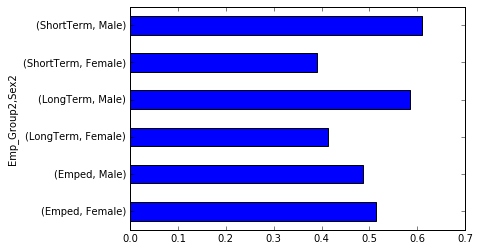

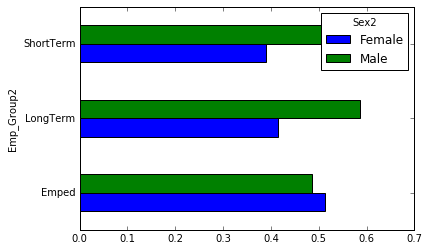

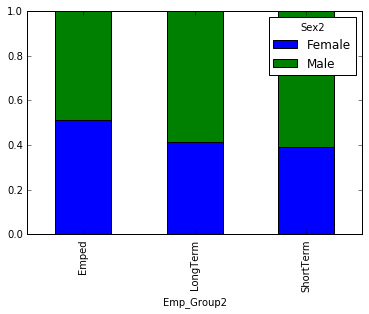

In [18]:
# Graph Group #1:  Percent of each demographic group in each EmpGroup
# From Table 1
#by_LT_Sex2_per2=pt3.stack()

# Graph 1: 1 bar each pair.  pair:  emp group and 1 demograpic group
# Num Bars.  3 times # demographic groups
by_LT_Sex2_per2.plot(kind='barh')
# Graph 2: Each emp group:  X val.  demographics grouped by emp group.  three groups, N bars each grp, is N categories, 
#  1 bar each pair.  pair:  emp group and 1 demograpic group
by_LT_Sex2_per2.unstack().plot(kind='barh')

# Graph 3: 100% bar graph.  1 bar, Each emp group.  categories within each bar.  makeup composition
by_LT_Sex2_per2.unstack().plot.bar(stacked=True)

In [19]:
# table 2a.  differences between emp groups in each category group
# table is easier to read than graphs if there are a lot of groups
# abs so you can see biggest differences.  other you know which ones are larger than others


pt4=pt3.T



# greatest distances
pt4['EmpVsLT'] = (pt4['Emped'] - pt4['LongTerm']).abs()
pt4['EmpVsST'] = (pt4['Emped'] - pt4['ShortTerm']).abs()
pt4['StVsLT'] = (pt4['ShortTerm'] - pt4['LongTerm']).abs()

del pt4['Emped']
del pt4['LongTerm']
del pt4['ShortTerm']

pt4.stack()
pt5=pt4.stack()
print(pt5)
'''
pt5=pt4.stack()
#pt5.sort_values(axis=0)
print(pt5)
'''


# ? how put in more readable formatted table 
#     - more readable
#     - percent format
#     - how sort across both category groups.  Sort largest to smallest all percent
#     - title for percent columns ???????

Sex2    Emp_Group2
Female  EmpVsLT       0.099908
        EmpVsST       0.124036
        StVsLT        0.024128
Male    EmpVsLT       0.099908
        EmpVsST       0.124036
        StVsLT        0.024128
dtype: float64


'\npt5=pt4.stack()\n#pt5.sort_values(axis=0)\nprint(pt5)\n'

In [20]:
# table 2b.  differences between emp groups in each category group
# table is easier to read than graphs if there are a lot of groups
# you know which ones are larger than others based on positive or negative vals

#pt2=pd.pivot_table(LT_Sex2,index=['Emp_Group2'],columns='Sex2',aggfunc='size', fill_value=0)
#pt2['sum']=pt2.sum(axis=1)
#pt3=pt2.div(pt2['sum'], axis=0)
#del pt3['sum']
#by_LT_Sex2_per2=pt3.stack()
#pt3['minus']=pt3[0]
#print(pt3)

#pt3.T is transposed.  rows as columns.  # categories X 3.  3 being # of empGroups
pd4ntabs=pt3.T


# ? maybe abs to compare, but would actually like difference graph where some are negative?
#? differences between different emp groups.  Figuring out which groups have biggest differences
#pt4['EmpVsLT']=pt4['Emped'].subtract(pt4['LongTerm']).abs()

# greatest distances

pd4ntabs['EmpVsLT'] = pd4ntabs['Emped'] - pd4ntabs['LongTerm']
pd4ntabs['EmpVsST'] = pd4ntabs['Emped'] - pd4ntabs['ShortTerm']
pd4ntabs['StVsLT'] = pd4ntabs['ShortTerm'] - pd4ntabs['LongTerm']

# delete original columns so that we just keep the percents
del pd4ntabs['Emped']
del pd4ntabs['LongTerm']
del pd4ntabs['ShortTerm']
#print(pt4)

pd4ntabs.stack()
pd5ntabs=pd4ntabs.stack()

pd5ntabs

#pd5ntabs.sort_values(axis=0)
#print(pd5ntabs)
'''
pt5=pt4.stack()
#pt5.sort_values(axis=0)
print(pt5)
'''


# ? how put table 
#- more readable
#- percent format
#- how sort across both category groups.  Sort largest to smallest all percent

'\npt5=pt4.stack()\n#pt5.sort_values(axis=0)\nprint(pt5)\n'

Emp_Group2  Sex2  
Emped       Female    0.514142
            Male      0.485858
LongTerm    Female    0.414234
            Male      0.585766
ShortTerm   Female    0.390106
            Male      0.609894
dtype: float64
Sex2    Emp_Group2
Female  EmpVsLT       0.099908
        EmpVsST       0.124036
        StVsLT        0.024128
Male    EmpVsLT       0.099908
        EmpVsST       0.124036
        StVsLT        0.024128
dtype: float64


Sex2    Emp_Group2
Female  EmpVsLT       0.099908
        EmpVsST       0.124036
        StVsLT       -0.024128
Male    EmpVsLT      -0.099908
        EmpVsST      -0.124036
        StVsLT        0.024128
dtype: float64

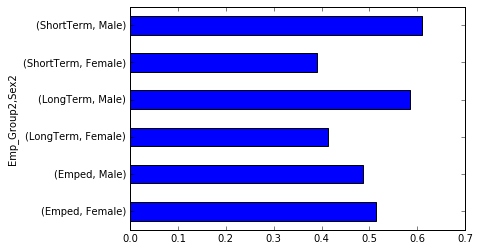

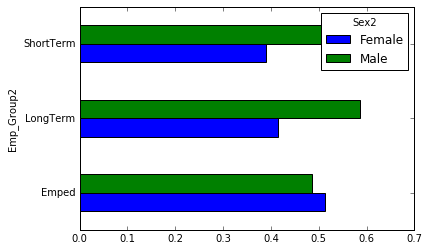

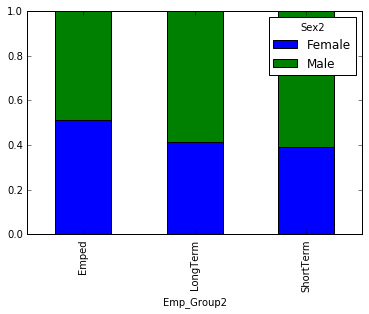

In [21]:
# 1 cell, all tables and graphs


# table 1.  distribution of category group within each emp groups
df_Sex2_2y=df_2y
LT_Sex2=df_Sex2_2y.loc[:,['Emp_Group2','Sex2']]
pt2=pd.pivot_table(LT_Sex2,index=['Emp_Group2'],columns='Sex2',aggfunc='size', fill_value=0)
pt2['sum']=pt2.sum(axis=1)
pt3=pt2.div(pt2['sum'], axis=0)
del pt3['sum']
by_LT_Sex2_per2=pt3.stack()
by_LT_Sex2_per2

# table 1.  distribution of category group within each emp groups
print(by_LT_Sex2_per2)

# Graph Group #1:  Percent of each demographic group in each EmpGroup
by_LT_Sex2_per2.plot(kind='barh')
by_LT_Sex2_per2.unstack().plot(kind='barh')
by_LT_Sex2_per2.unstack().plot.bar(stacked=True)

# table 2a.  differences between emp groups in each category group
pt4=pt3.T
pt4['EmpVsLT'] = (pt4['Emped'] - pt4['LongTerm']).abs()
pt4['EmpVsST'] = (pt4['Emped'] - pt4['ShortTerm']).abs()
pt4['StVsLT'] = (pt4['ShortTerm'] - pt4['LongTerm']).abs()

del pt4['Emped']
del pt4['LongTerm']
del pt4['ShortTerm']
#print(pt4)

pt4.stack()
pt5=pt4.stack()
# table 2a.  differences between emp groups in each category group
print(pt5)

# table 2b.  differences between emp groups in each category group
pd4ntabs=pt3.T
# greatest distances

pd4ntabs['EmpVsLT'] = pd4ntabs['Emped'] - pd4ntabs['LongTerm']
pd4ntabs['EmpVsST'] = pd4ntabs['Emped'] - pd4ntabs['ShortTerm']
pd4ntabs['StVsLT'] = pd4ntabs['ShortTerm'] - pd4ntabs['LongTerm']

# delete original columns so that we just keep the percents
del pd4ntabs['Emped']
del pd4ntabs['LongTerm']
del pd4ntabs['ShortTerm']
#print(pt4)

pd4ntabs.stack()
pd5ntabs=pd4ntabs.stack()
# table 2b.  differences between emp groups in each category group
pd5ntabs



In [ ]:
# macro each category for 3 emp groups



# only table 1 and graphs.  no tables 2a and 2b.  Want difference graphs.  easier to see differences.
def grfEDActe(cvarn):
    # table 1.  distribution of category group within each emp groups
    df_cvarn_2y=df_2y
    LT_cvarn=df_cvarn_2y.loc[:,['Emp_Group2',cvarn]]
    pt2=pd.pivot_table(LT_cvarn,index=['Emp_Group2'],columns=cvarn,aggfunc='size', fill_value=0)
    pt2['sum']=pt2.sum(axis=1)
    pt3=pt2.div(pt2['sum'], axis=0)
    del pt3['sum']
    by_LT_cvarn_per2=pt3.stack()
     
    # table 1.  distribution of category group within each emp groups
    print(by_LT_cvarn_per2)
    # Graph group 1.  distribution of category group within each emp groups
    by_LT_cvarn_per2.plot(kind='barh')
    by_LT_cvarn_per2.unstack().plot(kind='barh')
    by_LT_cvarn_per2.unstack().plot.bar(stacked=True)
    del df_cvarn_2y
    del LT_cvarn
    del pt2
    del pt3
    del by_LT_cvarn_per2

    # table 2a.  differences between emp groups in each category group
    pt4=pt3.T
    pt4['EmpVsLT'] = (pt4['Emped'] - pt4['LongTerm']).abs()
    pt4['EmpVsST'] = (pt4['Emped'] - pt4['ShortTerm']).abs()
    pt4['StVsLT'] = (pt4['ShortTerm'] - pt4['LongTerm']).abs()

    del pt4['Emped']
    del pt4['LongTerm']
    del pt4['ShortTerm']
    #print(pt4)

    pt4.stack()
    pt5=pt4.stack()
    print(pt5)

    # table 2b.  differences between emp groups in each category group
    pd4ntabs=pt3.T

    # greatest distances
    pd4ntabs['EmpVsLT'] = pd4ntabs['Emped'] - pd4ntabs['LongTerm']
    pd4ntabs['EmpVsST'] = pd4ntabs['Emped'] - pd4ntabs['ShortTerm']
    pd4ntabs['StVsLT'] = pd4ntabs['ShortTerm'] - pd4ntabs['LongTerm']

    # delete original columns so that we just keep the percents
    del pd4ntabs['Emped']
    del pd4ntabs['LongTerm']
    del pd4ntabs['ShortTerm']
    #print(pt4)

    pd4ntabs.stack()
    pd5ntabs=pd4ntabs.stack()
    # table 2b.  differences between emp groups in each category group
    pd5ntabs


grfEDActe('Sex2')
    
# tables.  make a table.  title, sort, percent formats 

In [ ]:
#grfEDActe('Sex2')
'''    
#grfEDActe('MaritalStatus2')

    
#grfEDActe('Age')
#grfEDActe('Age2')
grfEDActe('MaritalStatus2')
grfEDActe('Sex2')
grfEDActe('educ2')
grfEDActe('Race2')
grfEDActe('identifier2')
grfEDActe('Hispanic2')
grfEDActe('Military22')
grfEDActe('MilitaryServ__when2')
grfEDActe('Disability2')


grfEDActe('WeeksUnEmp2')
grfEDActe('UnionMem2')
grfEDActe('attendSchool2')
grfEDActe('LabForceStat22')
grfEDActe('WorkingFull_Part2')
grfEDActe('PastLworkStat2')
grfEDActe('CLabFor2')
grfEDActe('UnempReas2')
grfEDActe('IsDiscoraged2')
grfEDActe('NumWeeksJobLook2')
grfEDActe('EarnLastJob2')
grfEDActe('LowIncStatus2')
grfEDActe('CovInsPriv82')
'''


In [ ]:
#######################33
### Numeric Exploratory Data analysis
#######################33

In [ ]:
# numeric not continuous values
# to examine relationship and distribution

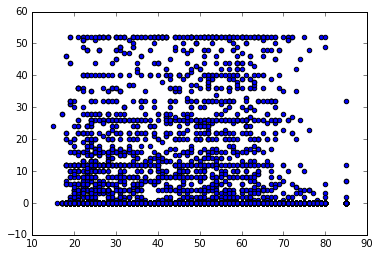

In [23]:


### other graphs
### Numeric
### tables good for numeric, put in category too
### and too many category look funny

########################################
########################################
## Take out 0s or NANs? -- HELP!!!!!!
## Some that imported as string might need reformatting to int
########################################
########################################

# 1. Scatter dot plot

df_2y['AgeN'] = df_2y['Age'].astype('float')


fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax.scatter(df_2y['AgeN'],df_2y['UnempWks'])

In [27]:
#http://courses.cs.washington.edu/courses/cse140/14wi/sections/08/section08-handout-14wi.pdf
#CorrData=df_2y.loc[:,['UnempWks','AgeN']]
#scipy.stats.pearsonr
import scipy as sp
from scipy.stats import pearsonr
#pearsonr(x, y)
#sp.stats.
pearsonr(df_2y['AgeN'],df_2y['UnempWks'])

(nan, 1.0)